# Exploratory Data Analysis

# Import dataset from Kaggle

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle    
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download imakash3011/customer-personality-analysis
! unzip customer-personality-analysis.zip

Archive:  customer-personality-analysis.zip
  inflating: marketing_campaign.csv  


# Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import plotly.express as px

# Load the dataset

In [ ]:
dataset = pd.read_csv('/content/marketing_campaign.csv', sep='\t')
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


# Preprocessing

In [ ]:
marketing = dataset.copy()

In [ ]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Handling missing values
  * Income

In [ ]:
marketing[marketing['Income'].isna()]
#marketing['Income'].fillna(0, inplace=True)
marketing.dropna(inplace=True)

In [ ]:
marketing.reset_index(inplace=True)

## Data Inspection

In [ ]:
marketing.describe()

,index,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,1121.867329,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,643.164161,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,566.750000,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1120.500000,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1678.250000,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,2239.000000,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
col_names = marketing.columns

for col in col_names:
  if col in ['Education', 'Marital_Status', 'Kidhome', 'Teenhome']:
    print(col, marketing[col].value_counts(), sep='\n')
    print('-'*100)

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64
----------------------------------------------------------------------------------------------------
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64
----------------------------------------------------------------------------------------------------
Kidhome
0    1283
1     887
2      46
Name: Kidhome, dtype: int64
----------------------------------------------------------------------------------------------------
Teenhome
0    1147
1    1018
2      51
Name: Teenhome, dtype: int64
----------------------------------------------------------------------------------------------------


## Parsing

In [ ]:
marketing['Dt_Customer'][:1]

0    04-09-2012
Name: Dt_Customer, dtype: object

In [ ]:
marketing['Dt_Customer'] = pd.to_datetime(marketing['Dt_Customer'].str.strip(), format="%d-%m-%Y")
marketing['Dt_Customer'][:1]

0   2012-09-04
Name: Dt_Customer, dtype: datetime64[ns]

In [ ]:
marketing['Dt_Customer_year'] = marketing['Dt_Customer'].dt.year
marketing['Dt_Customer_month'] = marketing['Dt_Customer'].dt.month
marketing['Dt_Customer_day'] = marketing['Dt_Customer'].dt.day

## Categorizing
  * Continuous values to cats for better analysis
  * "Income", "Year_Birth"

### Age group

In [ ]:
# Year_Birth --> age groups 
bins = list(range(1891, 2011, 10))
bins_label = [str(2021-int(x)-10) + 's' for x in bins]

marketing['Age_group'] = pd.cut(marketing['Year_Birth'], 
                                bins=bins, 
                                labels=bins_label[:-1],
                                right=True)

In [ ]:
marketing['Age_group'].value_counts()

40s     649
50s     579
60s     466
30s     314
70s     175
20s      28
120s      3
80s       2
90s       0
100s      0
110s      0
Name: Age_group, dtype: int64

### Income group

In [ ]:
marketing['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [ ]:
a = []
for ix, val in enumerate(marketing['Income']):
  # print(ix, val)
  if val in range(1700, 35000):
    a.append("lower")
  elif val in range(35000, 65000):
    a.append("middle")
  elif val in range(65000, 100000):
    a.append("upper")
  elif val >= 100000:
    a.append("6figures")
a[:10]

['middle',
 'middle',
 'upper',
 'lower',
 'middle',
 'middle',
 'middle',
 'lower',
 'lower',
 'lower']

In [ ]:
marketing['Income_group'] = pd.DataFrame(a)

In [ ]:
marketing['Income_group'].value_counts()

middle      991
upper       663
lower       549
6figures     13
Name: Income_group, dtype: int64

# EDA

In [ ]:
marketing

,index,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dt_Customer_year,Dt_Customer_month,Dt_Customer_day,Age_group,Income_group
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,2012,9,4,60s,middle
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2014,3,8,60s,middle
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,2013,8,21,50s,upper
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,2014,2,10,30s,lower
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,2014,1,19,40s,middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,2013,6,13,50s,middle
2212,2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,2014,6,10,70s,middle
2213,2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,2014,1,25,40s,middle
2214,2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,2014,1,24,60s,upper


In [ ]:
marketing.columns

Index(['index', 'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Dt_Customer_year', 'Dt_Customer_month', 'Dt_Customer_day', 'Age_group',
       'Income_group'],
      dtype='object')

## Customer personalities

### Avg spending
  * Demographic

#### age group

In [ ]:
marketing['Age_group'].value_counts()

40s     649
50s     579
60s     466
30s     314
70s     175
20s      28
120s      3
80s       2
90s       0
100s      0
110s      0
Name: Age_group, dtype: int64

In [ ]:
avg_spd_age = marketing.groupby('Age_group')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].mean()
avg_spd_age

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Age_group,,,,,,
120s,259.333333,50.000000,191.666667,39.333333,22.666667,83.666667
110s,NaN,NaN,NaN,NaN,NaN,NaN
100s,NaN,NaN,NaN,NaN,NaN,NaN
90s,NaN,NaN,NaN,NaN,NaN,NaN
80s,714.500000,21.000000,361.500000,27.500000,0.000000,13.500000
70s,408.188571,30.880000,210.577143,48.051429,32.297143,50.337143
60s,367.944206,27.851931,182.804721,41.390558,29.156652,47.240343
50s,320.979275,26.196891,155.355786,35.438687,25.766839,45.659758
40s,242.939908,22.653313,139.057011,32.998459,24.177196,38.516179


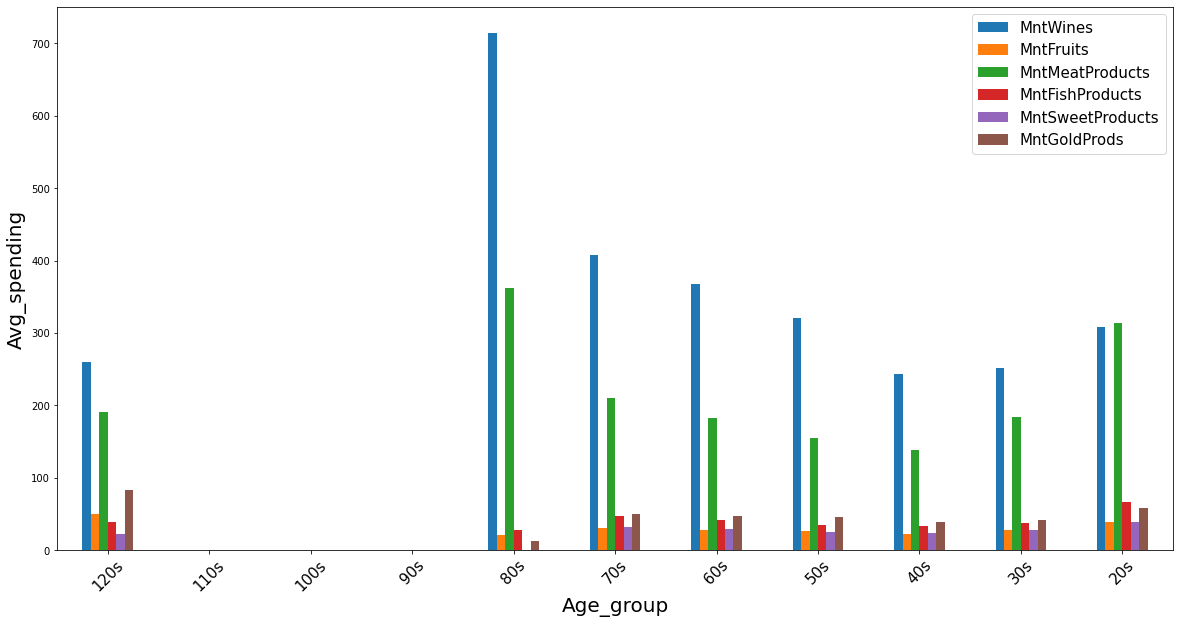

In [ ]:
avg_spd_age.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=45, fontsize=15)
plt.xlabel("Age_group",fontsize=20)
plt.ylabel("Avg_spending",fontsize=20)
plt.legend(fontsize=15);

#### Income

In [ ]:
avg_spd_inc = marketing.groupby('Income_group')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].mean()
avg_spd_inc

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Income_group,,,,,,
6figures,221.538462,32.538462,443.538462,29.923077,54.846154,47.230769
lower,21.324226,5.941712,22.289617,8.577413,5.825137,16.238616
middle,249.109990,16.591322,88.812311,22.967709,16.134208,41.374369
upper,625.381599,57.734540,398.260935,83.779789,60.325792,70.733032


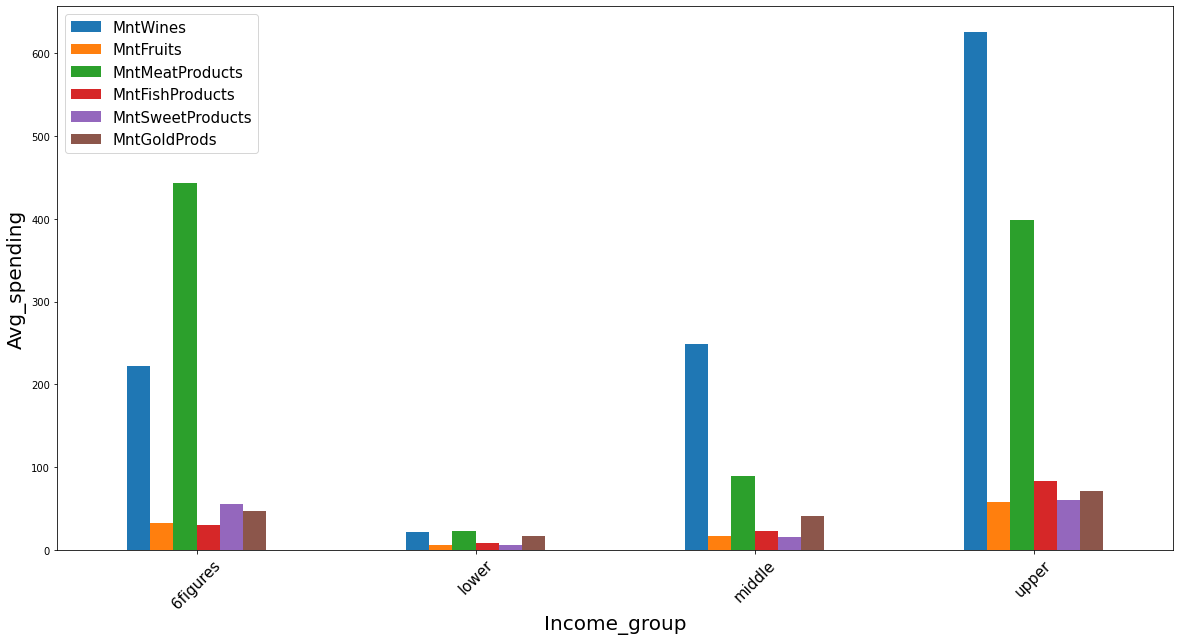

In [ ]:
avg_spd_inc.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=45, fontsize=15)
plt.xlabel("Income_group",fontsize=20)
plt.ylabel("Avg_spending",fontsize=20)
plt.legend(fontsize=15);

#### Child

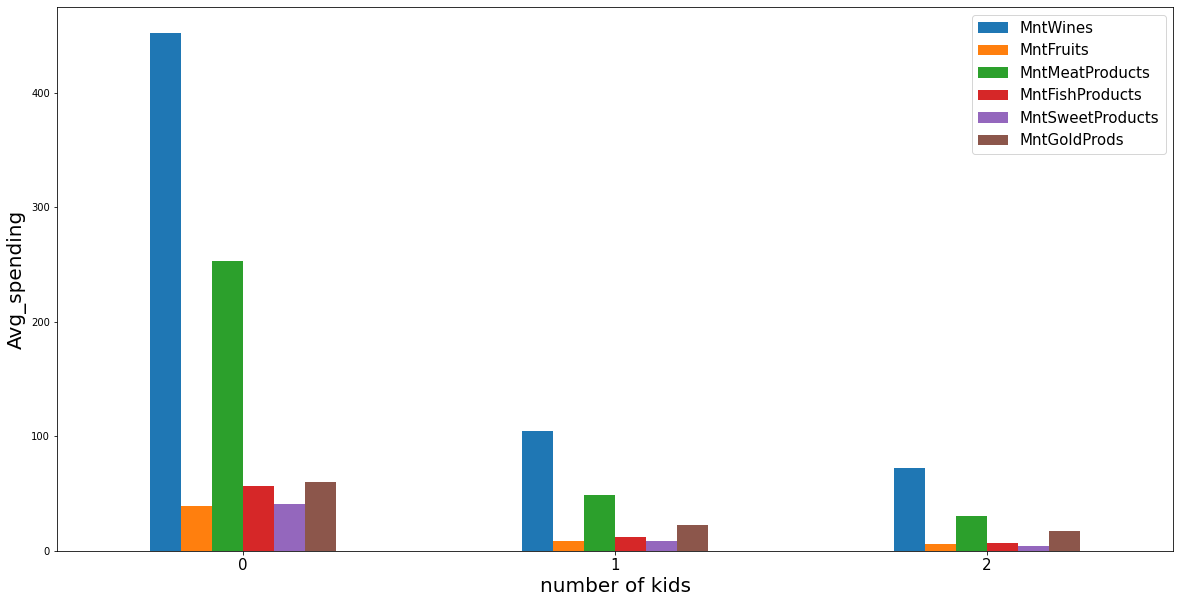

In [ ]:
# kid
avg_spd_kid = marketing.groupby('Kidhome')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].mean()
avg_spd_kid
avg_spd_kid.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("number of kids",fontsize=20)
plt.ylabel("Avg_spending",fontsize=20)
plt.legend(fontsize=15);

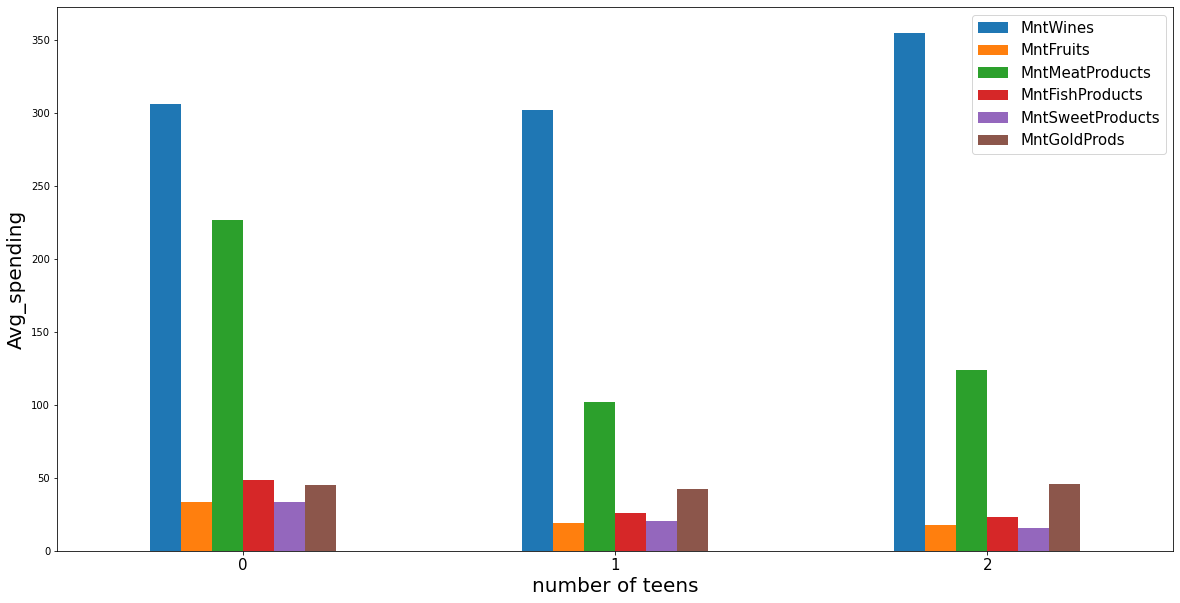

In [ ]:
# Teen
avg_spd_teen = marketing.groupby('Teenhome')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].mean()
avg_spd_teen
avg_spd_teen.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("number of teens",fontsize=20)
plt.ylabel("Avg_spending",fontsize=20)
plt.legend(fontsize=15);

#### Marital Status

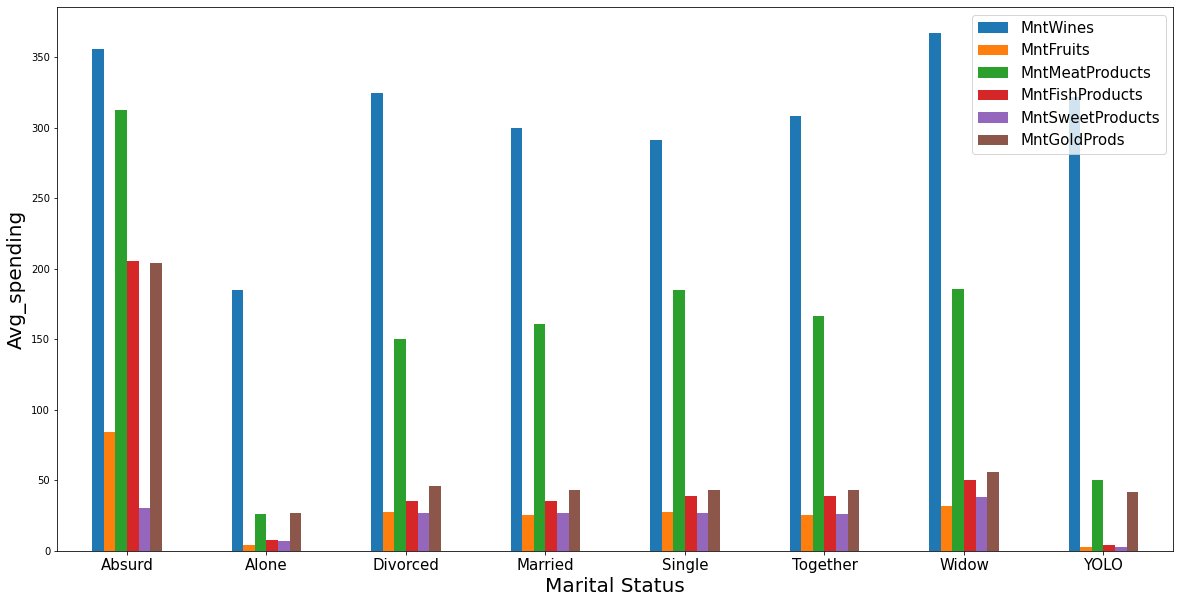

In [ ]:
avg_spd_ms = marketing.groupby('Marital_Status')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].mean()
avg_spd_ms
avg_spd_ms.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("Marital Status",fontsize=20)
plt.ylabel("Avg_spending",fontsize=20)
plt.legend(fontsize=15);

#### Education

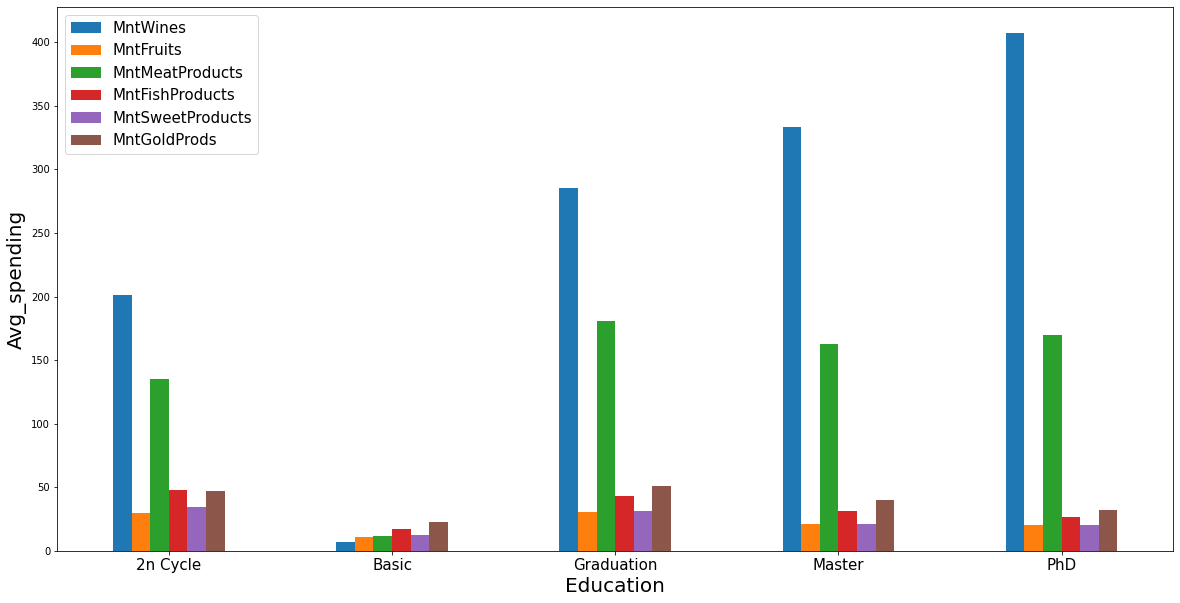

In [ ]:
avg_spd_edu = marketing.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].mean()
avg_spd_edu
avg_spd_edu.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("Education",fontsize=20)
plt.ylabel("Avg_spending",fontsize=20)
plt.legend(fontsize=15);

#### Time
  * Trend in Consumption

Year

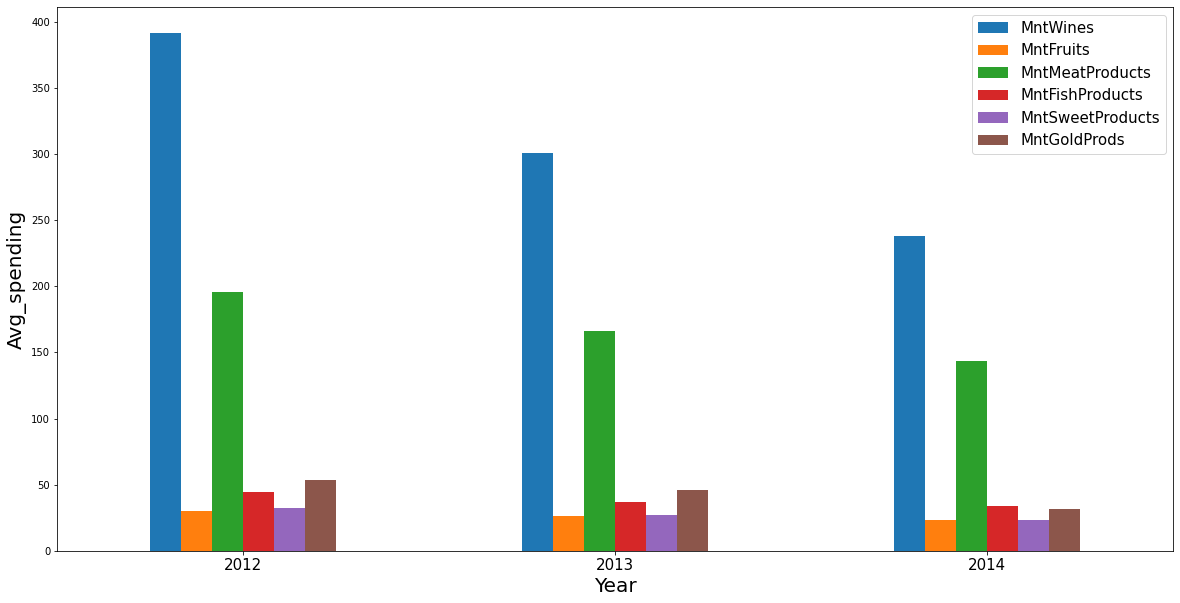

In [ ]:
avg_spd_year = marketing.groupby('Dt_Customer_year')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].mean()
avg_spd_year
avg_spd_year.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Avg_spending",fontsize=20)
plt.legend(fontsize=15);

Month

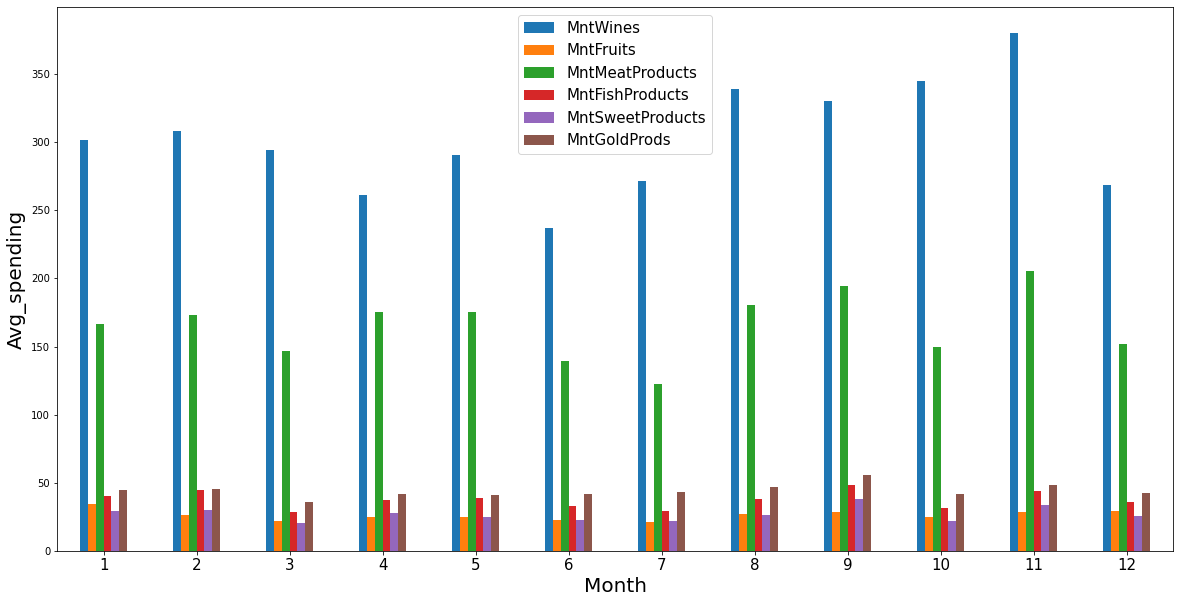

In [ ]:
avg_spd_month = marketing.groupby('Dt_Customer_month')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].mean()
avg_spd_month
avg_spd_month.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("Month",fontsize=20)
plt.ylabel("Avg_spending",fontsize=20)
plt.legend(fontsize=15);

Day

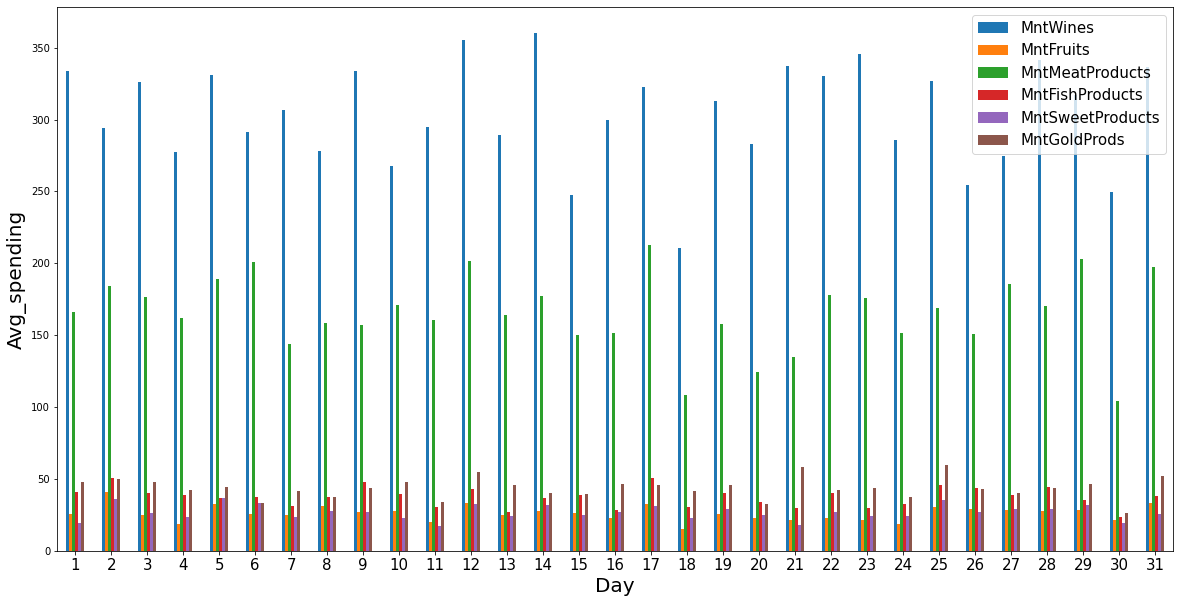

In [ ]:
avg_spd_day = marketing.groupby('Dt_Customer_day')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].mean()
avg_spd_day
avg_spd_day.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("Day",fontsize=20)
plt.ylabel("Avg_spending",fontsize=20)
plt.legend(fontsize=15);

### CS (Customer Satisfaction)
  * improvement?
  * who complained?

In [ ]:
marketing['Complain'].value_counts()

0    2195
1      21
Name: Complain, dtype: int64

In [ ]:
marketing.groupby('Complain')['Recency'].mean()

Complain
0    48.974032
1    53.047619
Name: Recency, dtype: float64

In [ ]:
cs = marketing[marketing['Complain'] == 1]
cs

#### Demographic

In [ ]:
cs['Age_group'].value_counts()

40s     6
60s     6
30s     3
70s     3
20s     1
50s     1
120s    1
80s     0
90s     0
100s    0
110s    0
Name: Age_group, dtype: int64

In [ ]:
cs['Education'].value_counts()

Graduation    14
2n Cycle       4
Master         2
PhD            1
Name: Education, dtype: int64

In [ ]:
cs['Income_group'].value_counts()

middle    11
lower      5
upper      5
Name: Income_group, dtype: int64

In [ ]:
cs[['Kidhome','Teenhome']].value_counts()

Kidhome  Teenhome
1        0           6
         1           5
0        1           4
         0           4
2        0           1
1        2           1
dtype: int64

In [ ]:
cs['Kidhome'].value_counts()

1    12
0     8
2     1
Name: Kidhome, dtype: int64

In [ ]:
cs['Teenhome'].value_counts()

0    11
1     9
2     1
Name: Teenhome, dtype: int64

In [ ]:
cs['Marital_Status'].value_counts()

Married     8
Single      6
Together    5
Divorced    2
Name: Marital_Status, dtype: int64

In [ ]:
cs['Dt_Customer_year'].value_counts()

2013    12
2012     6
2014     3
Name: Dt_Customer_year, dtype: int64

In [ ]:
cs['Dt_Customer_month'].value_counts()

1     5
11    4
9     4
8     3
3     3
10    1
4     1
Name: Dt_Customer_month, dtype: int64

In [ ]:
cs['Dt_Customer_day'].value_counts()

3     3
20    2
13    2
12    2
4     2
30    1
29    1
28    1
26    1
25    1
19    1
18    1
15    1
8     1
1     1
Name: Dt_Customer_day, dtype: int64

### Purchase Pattern
  * Who buys what at where?

#### Web visit

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter(marketing['NumWebVisitsMonth'],marketing['NumWebPurchases'], alpha=0.5)
plt.scatter(marketing['NumWebVisitsMonth'],marketing['NumStorePurchases'],alpha=0.5)
plt.scatter(marketing['NumWebVisitsMonth'],marketing['NumCatalogPurchases'],alpha=0.5)
plt.scatter(marketing['NumWebVisitsMonth'],marketing['NumDealsPurchases'],alpha=0.5);

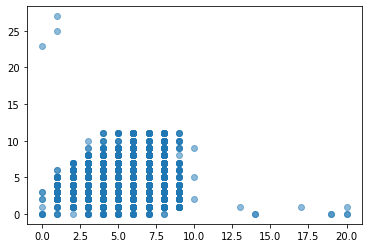

In [ ]:
plt.scatter(marketing['NumWebVisitsMonth'],marketing['NumWebPurchases'], alpha=0.5);

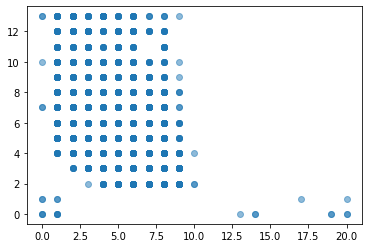

In [ ]:
plt.scatter(marketing['NumWebVisitsMonth'],marketing['NumStorePurchases'],alpha=0.5);

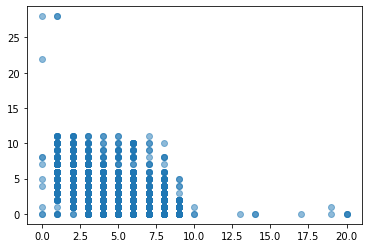

In [ ]:
plt.scatter(marketing['NumWebVisitsMonth'],marketing['NumCatalogPurchases'],alpha=0.5);

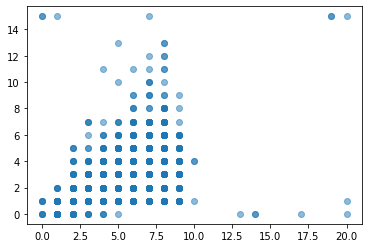

In [ ]:
plt.scatter(marketing['NumWebVisitsMonth'],marketing['NumDealsPurchases'],alpha=0.5);

#### Demographic
  * age, income, child, marital, education, time

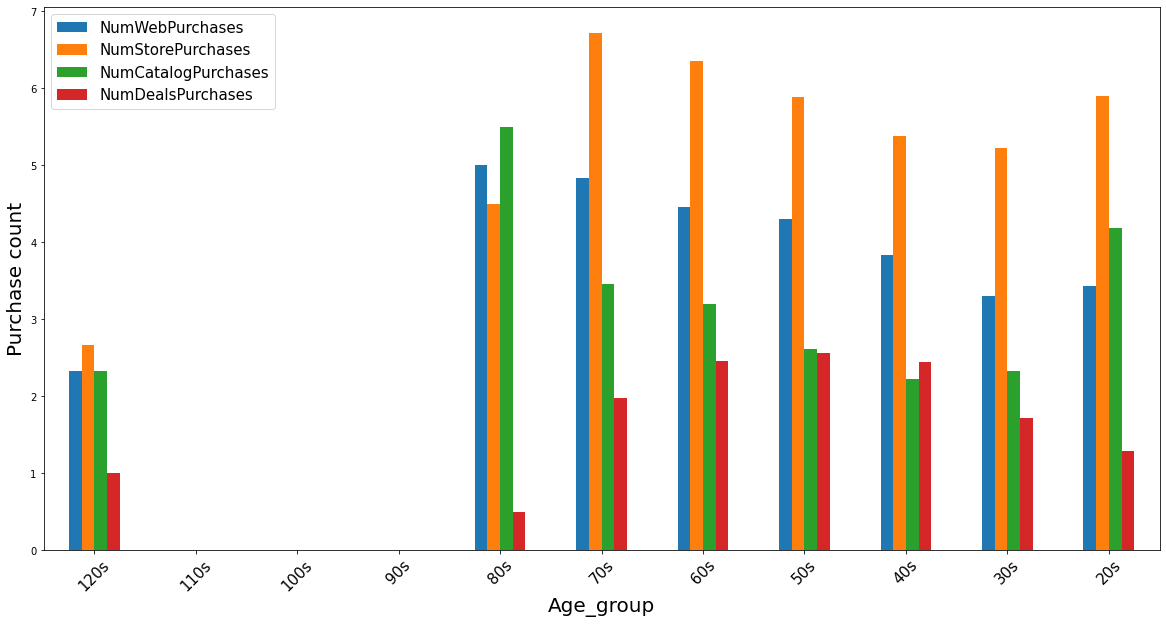

In [ ]:
pp_age = marketing.groupby('Age_group')[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases','NumDealsPurchases']].mean()
pp_age.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=45, fontsize=15)
plt.xlabel("Age_group",fontsize=20)
plt.ylabel("Purchase count",fontsize=20)
plt.legend(fontsize=15);

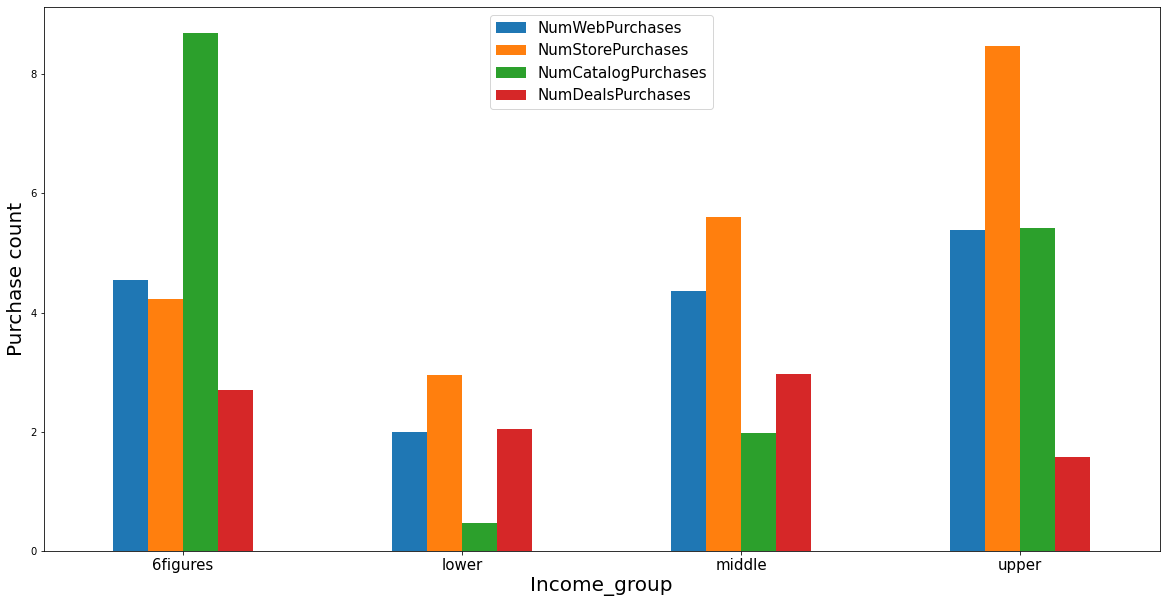

In [ ]:
pp_income = marketing.groupby('Income_group')[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases','NumDealsPurchases']].mean()
pp_income.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("Income_group",fontsize=20)
plt.ylabel("Purchase count",fontsize=20)
plt.legend(fontsize=15);

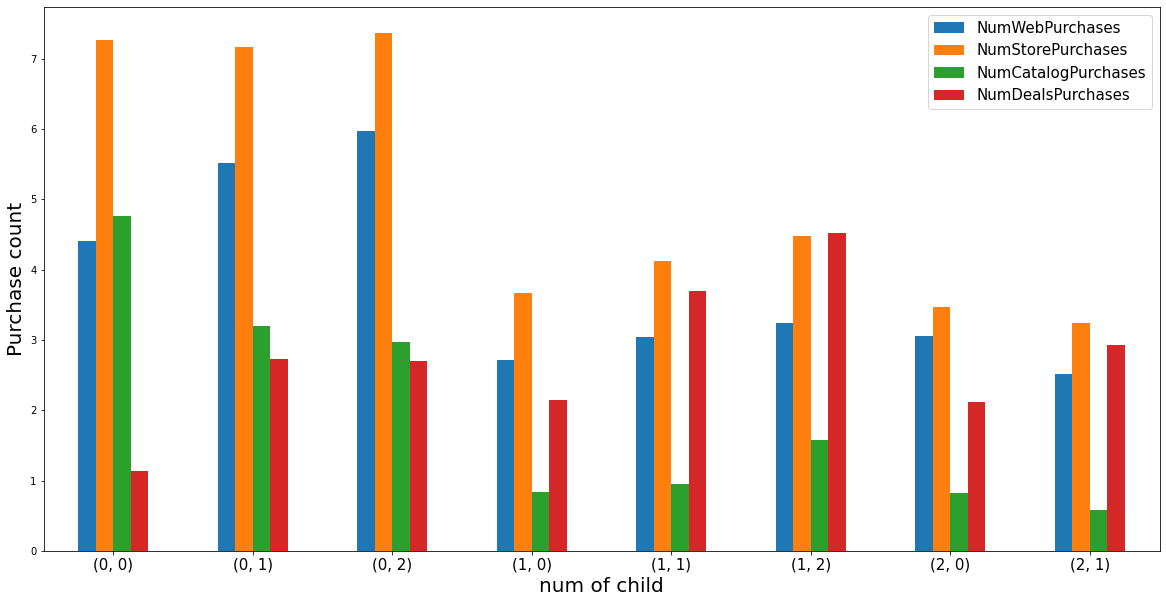

In [ ]:
pp_child = marketing.groupby(['Kidhome', 'Teenhome'])[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases','NumDealsPurchases']].mean()
pp_child.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("num of child",fontsize=20)
plt.ylabel("Purchase count",fontsize=20)
plt.legend(fontsize=15);

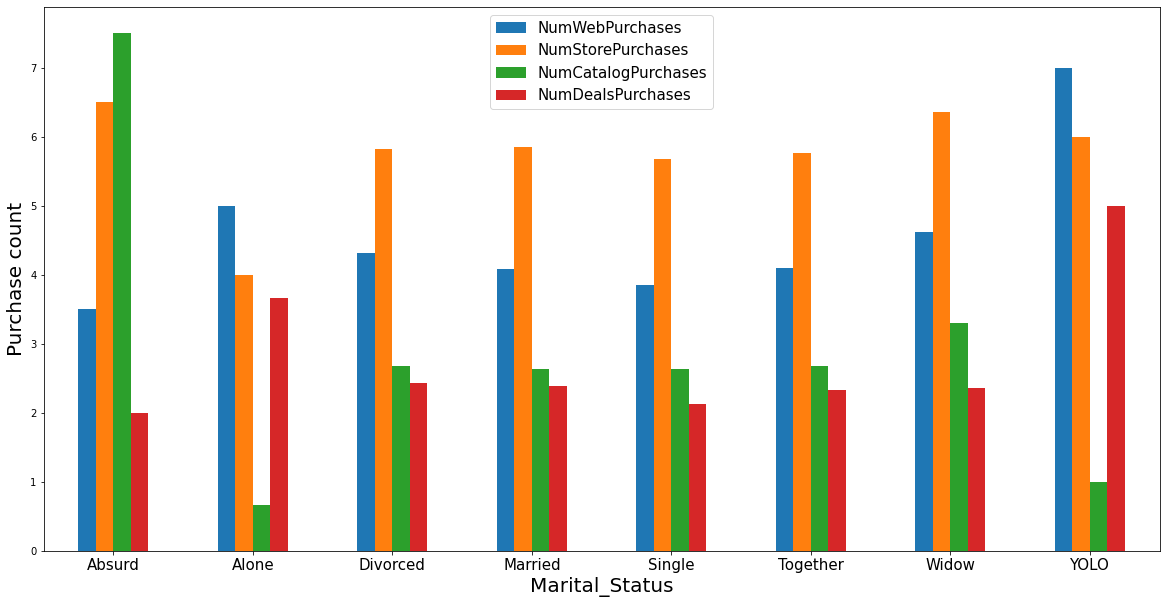

In [ ]:
pp_ms = marketing.groupby('Marital_Status')[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases','NumDealsPurchases']].mean()
pp_ms.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("Marital_Status",fontsize=20)
plt.ylabel("Purchase count",fontsize=20)
plt.legend(fontsize=15);

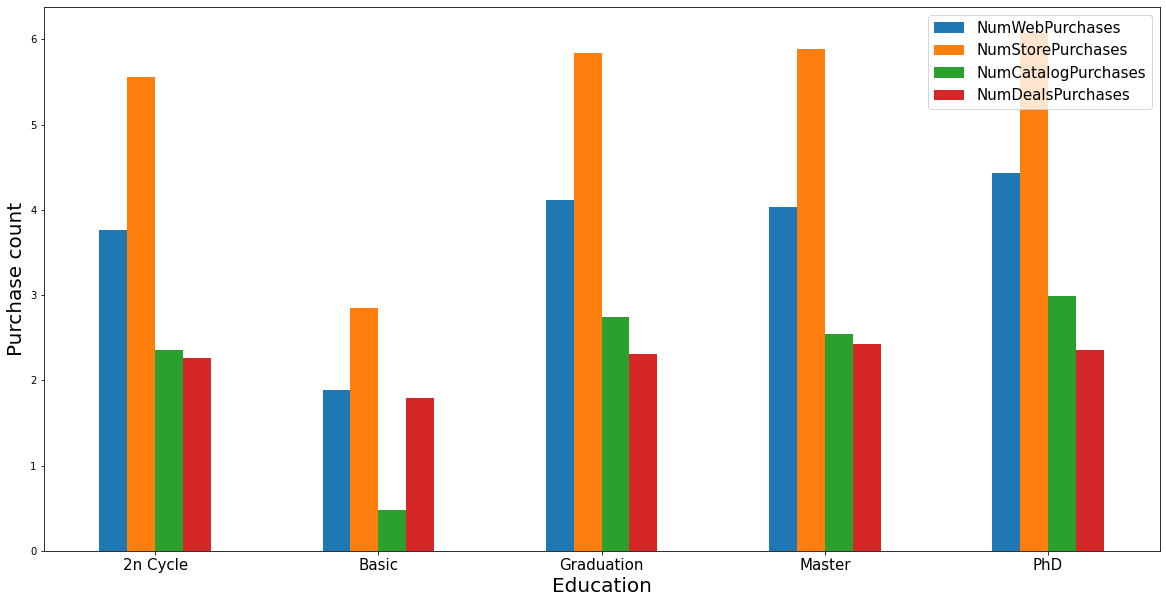

In [ ]:
pp_edu = marketing.groupby('Education')[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases','NumDealsPurchases']].mean()
pp_edu.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("Education",fontsize=20)
plt.ylabel("Purchase count",fontsize=20)
plt.legend(fontsize=15);

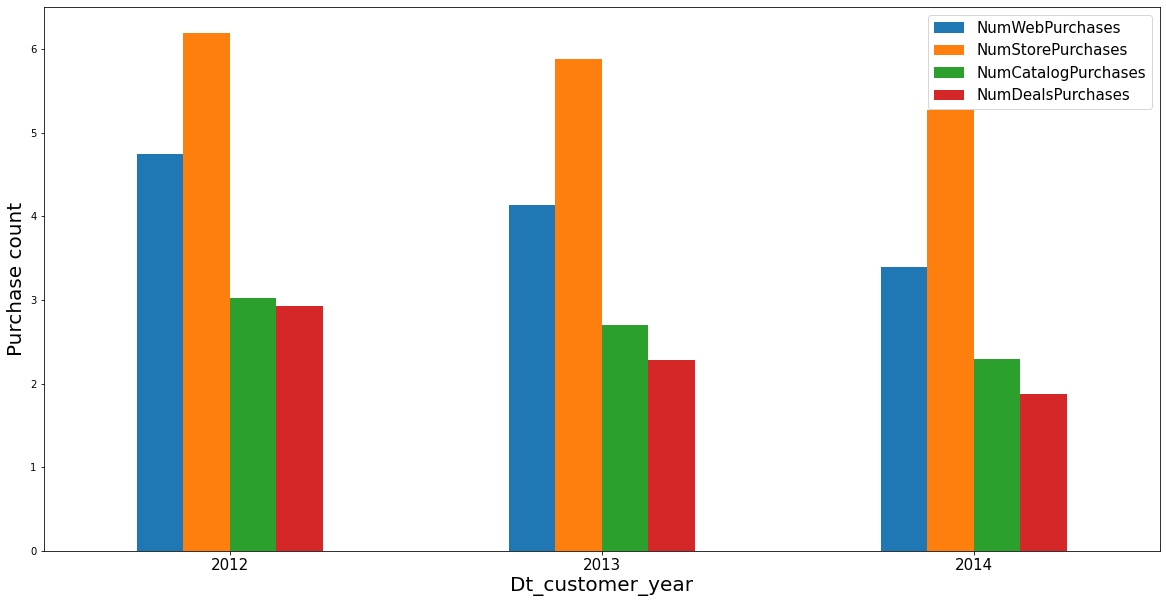

In [ ]:
pp_year = marketing.groupby('Dt_Customer_year')[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases','NumDealsPurchases']].mean()
pp_year.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("Dt_customer_year",fontsize=20)
plt.ylabel("Purchase count",fontsize=20)
plt.legend(fontsize=15);

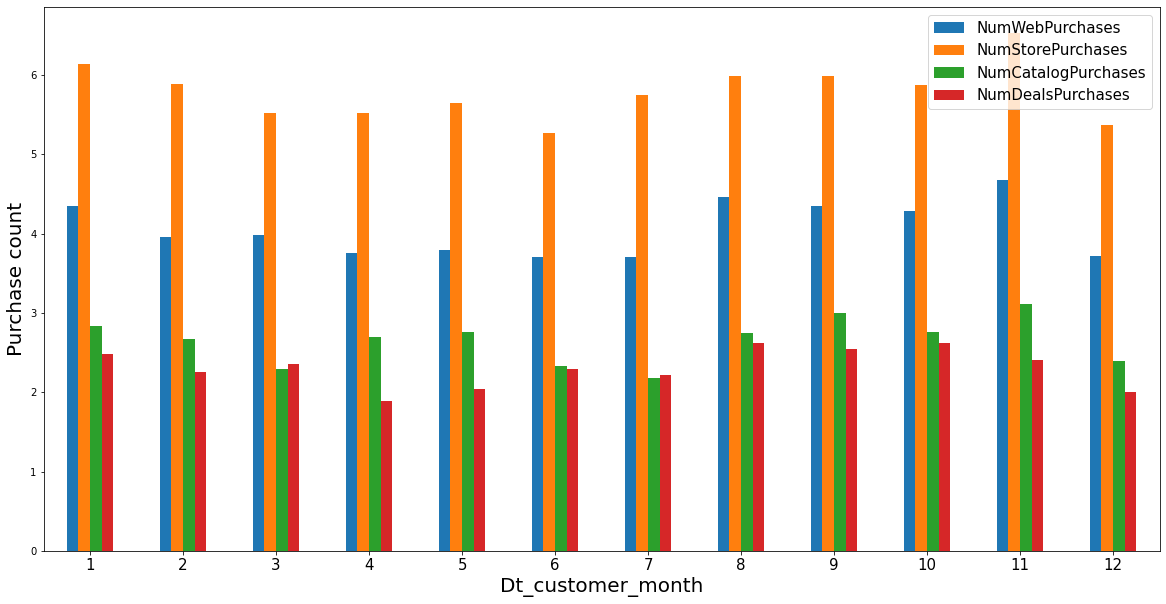

In [ ]:
pp_month = marketing.groupby('Dt_Customer_month')[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases','NumDealsPurchases']].mean()
pp_month.plot(kind='bar', figsize=(20,10))
plt.xticks(rotation=0, fontsize=15)
plt.xlabel("Dt_customer_month",fontsize=20)
plt.ylabel("Purchase count",fontsize=20)
plt.legend(fontsize=15);

### Campaign Effectiveness
  * promotional campaign (coupon, price reduction, bogo)
  * Who responded to what?

In [ ]:
c1 = marketing[marketing['AcceptedCmp1'] == 1]
c2 = marketing[marketing['AcceptedCmp2'] == 1]
c3 = marketing[marketing['AcceptedCmp3'] == 1]
c4 = marketing[marketing['AcceptedCmp4'] == 1]
c5 = marketing[marketing['AcceptedCmp5'] == 1]

************************************************** Campaign1 **************************************************


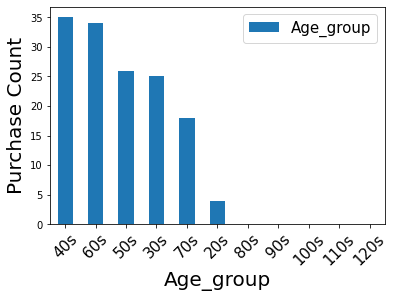

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

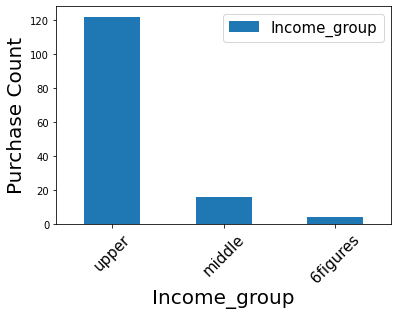

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

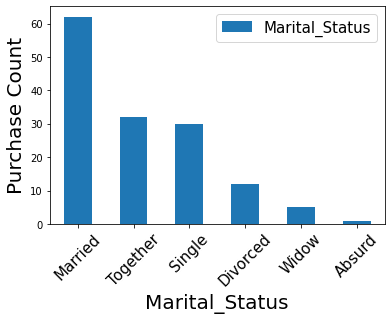

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

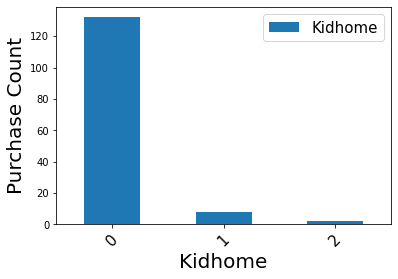

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

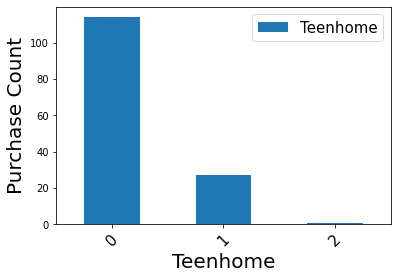

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

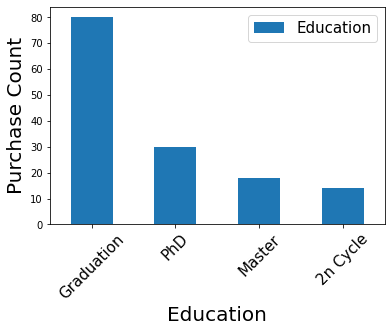

----------------------------------------------------------------------------------------------------
************************************************** Campaign2 **************************************************


<Figure size 432x288 with 0 Axes>

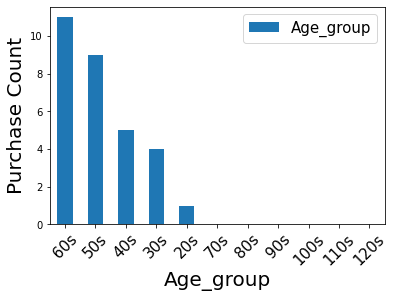

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

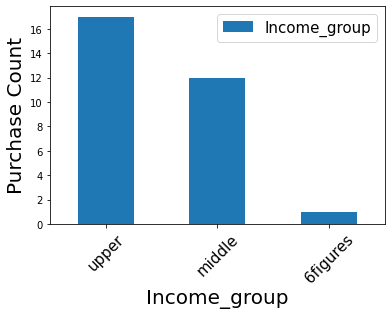

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

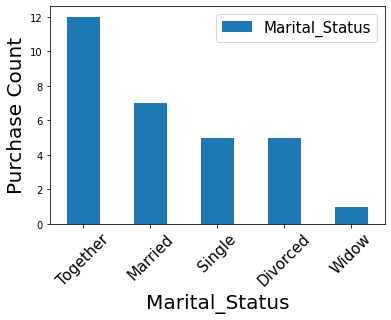

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

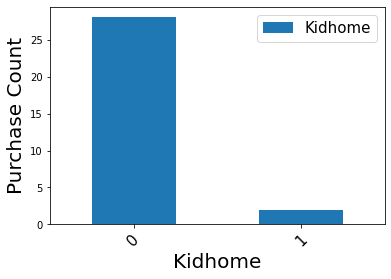

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

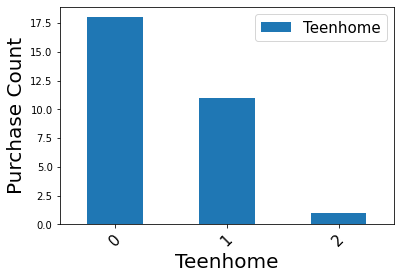

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

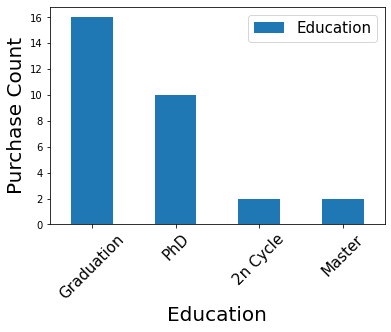

----------------------------------------------------------------------------------------------------
************************************************** Campaign3 **************************************************


<Figure size 432x288 with 0 Axes>

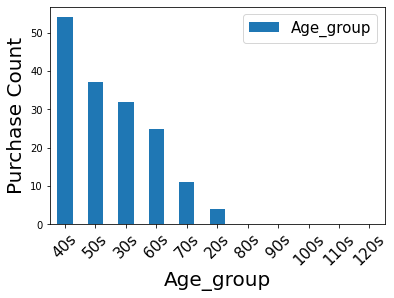

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

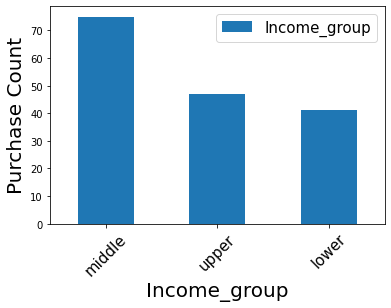

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

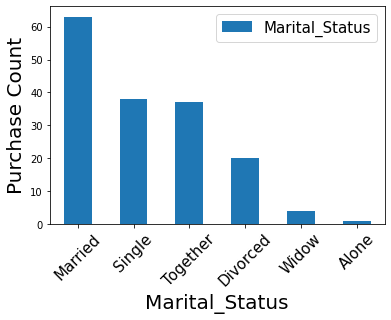

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

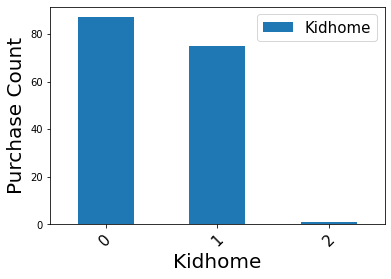

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

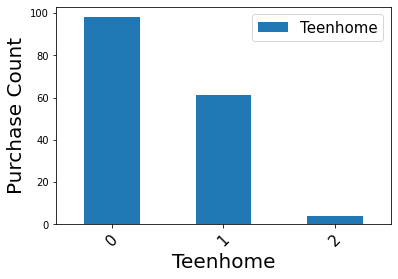

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

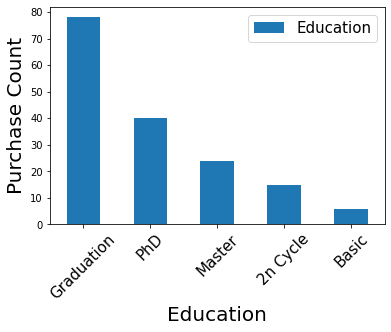

----------------------------------------------------------------------------------------------------
************************************************** Campaign4 **************************************************


<Figure size 432x288 with 0 Axes>

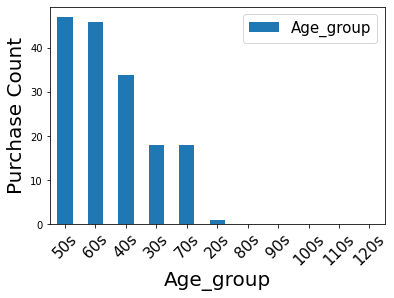

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

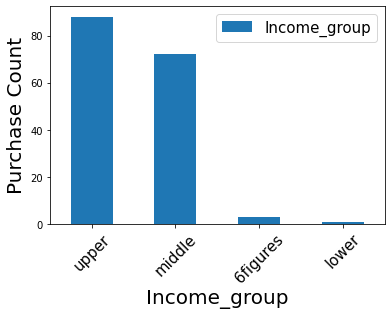

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

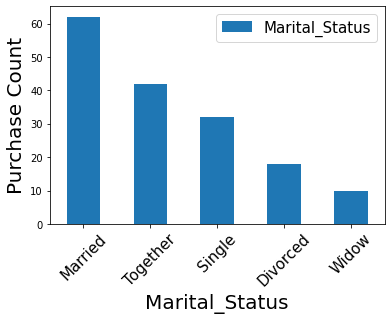

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

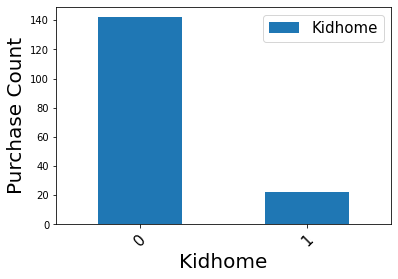

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

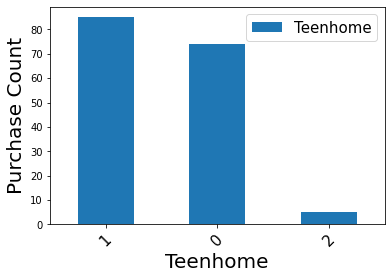

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

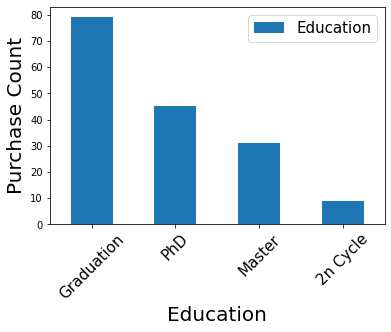

----------------------------------------------------------------------------------------------------
************************************************** Campaign5 **************************************************


<Figure size 432x288 with 0 Axes>

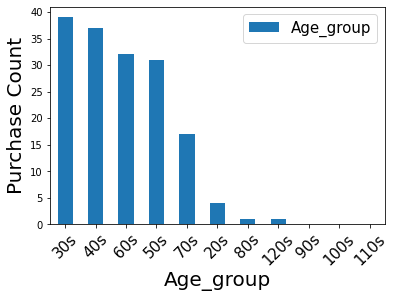

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

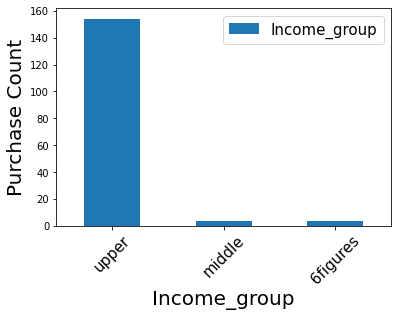

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

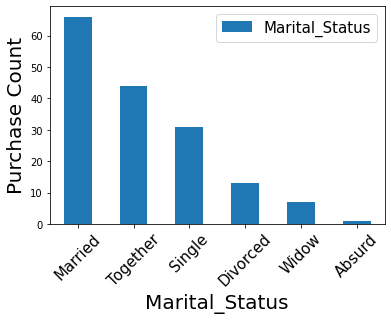

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

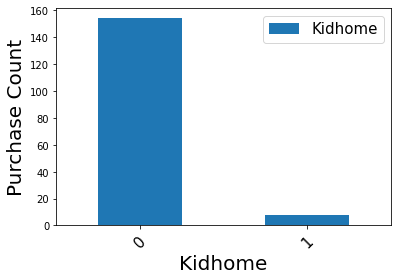

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

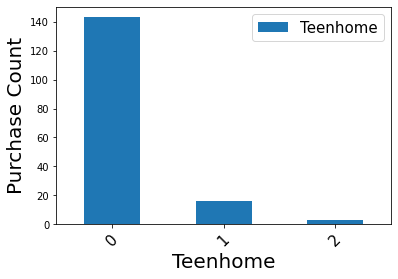

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

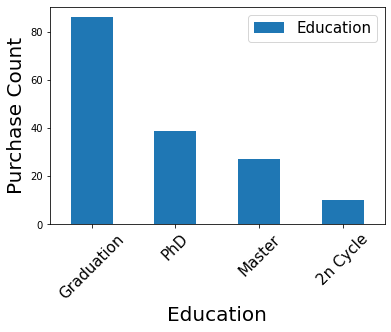

----------------------------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [ ]:
cats = ['Age_group', 'Income_group', 'Marital_Status', 'Kidhome', 'Teenhome', 'Education']
campaigns = [c1, c2, c3, c4, c5]
i = 1
for campaign in campaigns:
  print('*'*50, f'Campaign{i}', '*'*50)
  for cat in cats: 
    plt.figure()
    campaign[cat].value_counts().plot(kind='bar')
    plt.xticks(rotation=45, fontsize=15)
    plt.xlabel(cat,fontsize=20)
    plt.ylabel("Purchase Count",fontsize=20)
    plt.legend(fontsize=15)
    plt.show()
    print('-'*100)
    # plt.savefig(f"{i}_{cat}.png")
  i += 1